# **Bellabeat Case Study**
## *Carlo Monitto*

### Mission Statement
Bellabeat is a manufacturer of high-tech, health-focused products for women. They are looking for analysis to help them grow in the smart device market.

### Analysis Questions:
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

### Deliverables:
1. A clear summary of business task
1. A description of all data sources used
1. Documentation of any cleaning or manipulation of data
1. A summary of your analysis
1. Supporting visualizations and key findings
1. My top high-level content recommendations based on my analysis

## Importing Data
*Data is from [Fitbit Data Tracker](http://www.kaggle.com/datasets/arashnic/fitbit?resource=download)*

In [63]:
# Load relevent libraries
library(tidyverse)
library(lubridate)
library(dplyr)
library('scales')

# Import relevent data
dailyActivity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
sleepDayData <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourlySteps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourlyIntensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")


## Formatting data
1. Changed date columns from *chr* to *POSIXlt*
1. Changed Id from *num*(continuous) to *chr*(discrete)
1. Added new columns for date and time to hourlySteps and hourlyIntensities tables

In [64]:
# formatting date columns into date format
dailyActivity$ActivityDate <- strptime(as.character(dailyActivity$ActivityDate), "%m/%d/%Y")
dailyCalories$ActivityDay <- strptime(as.character(dailyCalories$ActivityDay), "%m/%d/%Y %I:%M:%S %p")
dailyIntensities$ActivityDay <- strptime(as.character(dailyIntensities$ActivityDay), "%m/%d/%Y %I:%M:%S %p")
sleepDayData$SleepDay <- strptime(as.character(sleepDayData$SleepDay), "%m/%d/%Y")

# seperating date and time into new fields
hourlySteps$ActivityHour <- strptime(as.character(hourlySteps$ActivityHour), "%m/%d/%Y %I:%M:%S %p")
hourlySteps$Hour <- format(hourlySteps$ActivityHour, format = "%H")
hourlySteps$date <- format(hourlySteps$ActivityHour, format = "%m/%d/%Y")

hourlyIntensities$ActivityHour <- strptime(as.character(hourlyIntensities$ActivityHour), "%m/%d/%Y %I:%M:%S %p")
hourlyIntensities$Hour <- format(hourlyIntensities$ActivityHour, format = "%H")
hourlyIntensities$date <- format(hourlyIntensities$ActivityHour, format = "%m/%d/%Y")

# change Id to discrete
dailyActivity$Id <- as.character(dailyActivity$Id)
dailyCalories$Id <- as.character(dailyCalories$Id)
dailyIntensities$Id <- as.character(dailyIntensities$Id)
sleepDayData$Id <- as.character(sleepDayData$Id)
hourlyIntensities$Id <- as.character(hourlyIntensities$Id)
hourlySteps$Id <- as.character(hourlySteps$Id)


#### Finding the number of unique users in each table

In [65]:
n_distinct(dailyActivity$Id)
n_distinct(dailyCalories$Id)
n_distinct(dailyIntensities$Id)
n_distinct(sleepDayData$Id)
n_distinct(hourlyIntensities$Id)
n_distinct(hourlySteps$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 33

[1] 33

# Analysis
## Areas Of Focus
* #### The trends of the users who logged their steps per day
* #### The hours of when the users are the most active
* #### The sleep trends of users


## First up:
### Average steps per day of each user 
* What are the trends of users
* How many users get the recommended amount of steps per day
### To Do:
* Graphing average/median steps per day using a barchart 
* Show the users under and above recommended amount threshold of 10,000

In [66]:
# created a new table grouping users by ID and taking their mean and median steps and checked if each passed the recommended threshold
summary_steps_per_user <- dailyActivity %>% group_by(Id) %>% 
  summarise(mean_steps = mean(TotalSteps), median_steps= median(TotalSteps)) %>% 
  mutate(reached_rec_value_mean = mean_steps >= 10000, reached_rec_value_median = median_steps >= 10000)

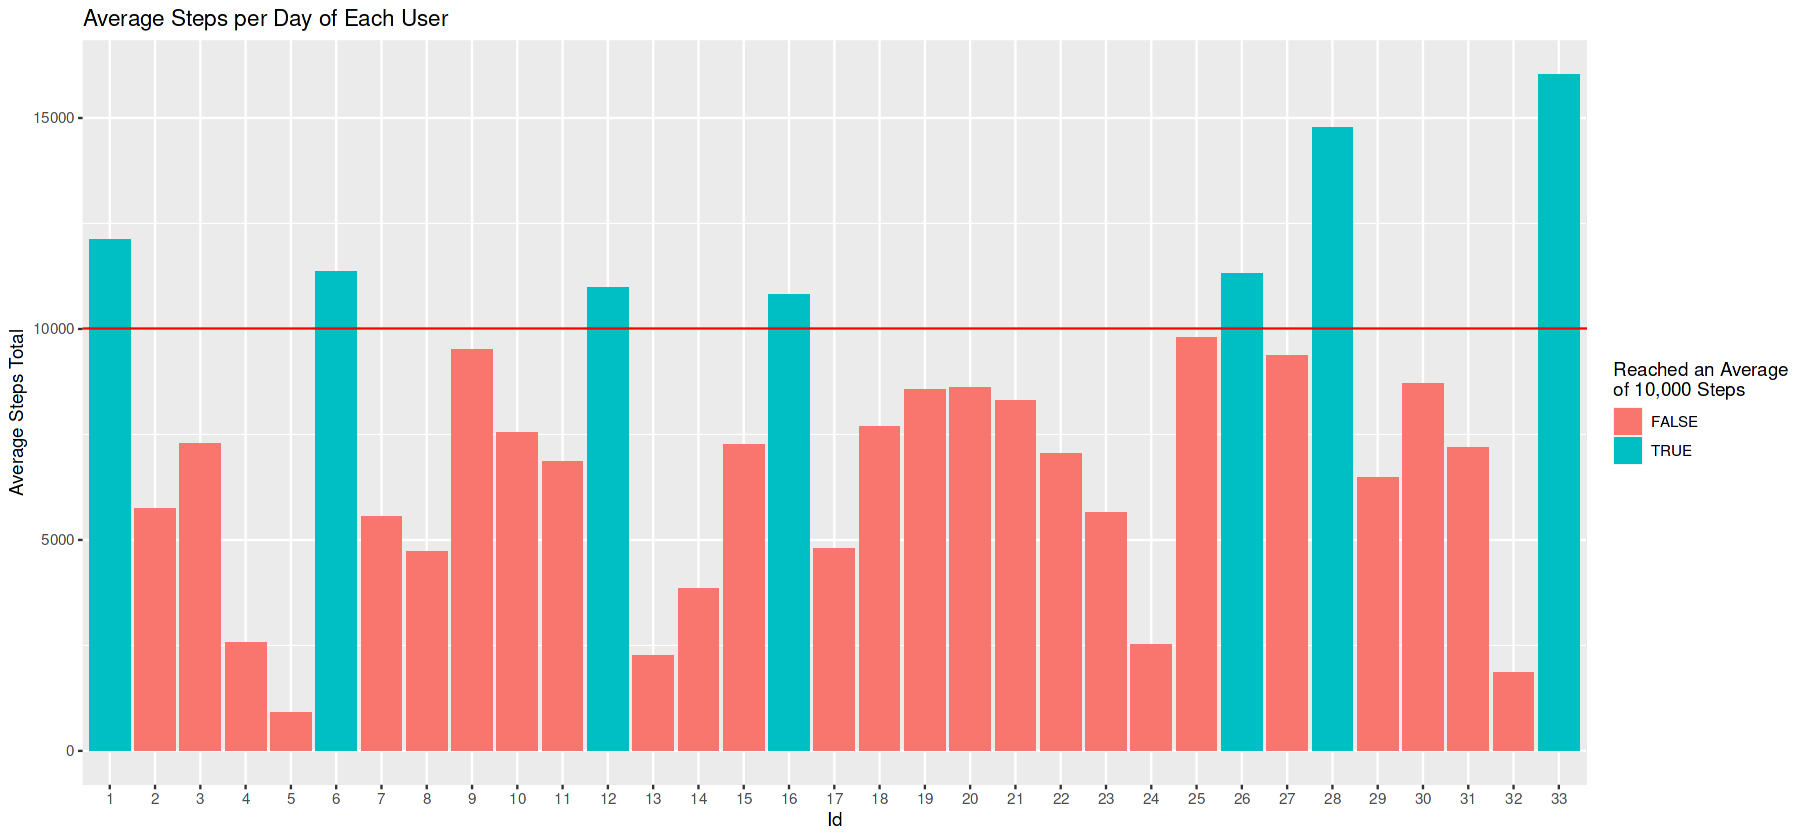

In [67]:
# make the graphs bigger for ease of reading
options(repr.plot.width = 15, repr.plot.height = 7)

# creating list for neater display of Ids
user_labels <- seq(1,n_distinct(summary_steps_per_user$Id), by=1)

# graph of the mean steps per day by user
ggplot(data = summary_steps_per_user, aes(x=Id,y=mean_steps, fill = reached_rec_value_mean)) + 
  geom_bar(stat = "identity")+ geom_abline(slope = 0, intercept = 10000, color="red")+
  scale_x_discrete(labels= user_labels) + labs(title = "Average Steps per Day of Each User") +
  ylab("Average Steps Total") + guides(fill=guide_legend(title = "Reached an Average\nof 10,000 Steps"))

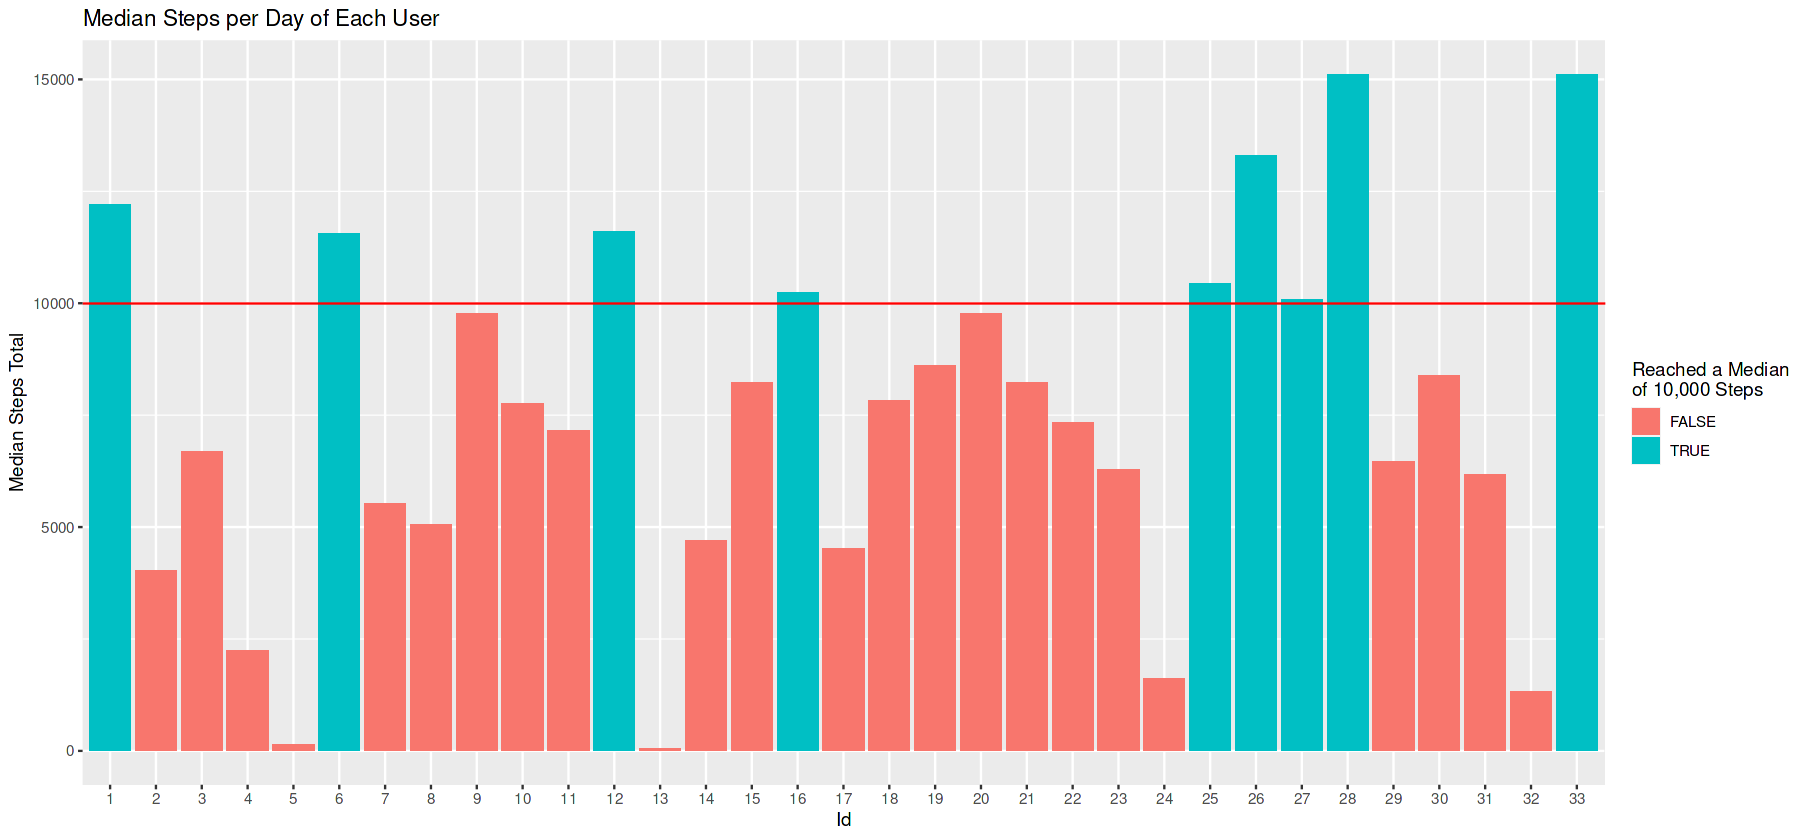

In [68]:
# median steps per day of each user
ggplot(data = summary_steps_per_user, aes(x=Id,y=median_steps, fill = reached_rec_value_median)) + 
  geom_bar(stat = "identity")+ geom_abline(slope = 0, intercept = 10000, color="red")+
  scale_x_discrete(labels= user_labels) + labs(title = "Median Steps per Day of Each User") +
  ylab("Median Steps Total") + guides(fill=guide_legend(title = "Reached a Median\nof 10,000 Steps"))

####  Finding the percent of users getting the recommended amount of steps per day


In [69]:
# percent of users getting recommended steps
users <- nrow(filter(summary_steps_per_user, reached_rec_value_mean))
pc <- percent((users/n_distinct(summary_steps_per_user$Id)), accuracy = .01)
cat("Percent of users mean steps is under 10,000: ", pc)

users <- nrow(filter(summary_steps_per_user, reached_rec_value_median))
pc <- percent((users/n_distinct(summary_steps_per_user$Id)), accuracy = .01)
cat("\nPercent of users median steps is under 10,000: ", pc)

Percent of users mean steps is under 10,000:  21.21%
Percent of users median steps is under 10,000:  27.27%

## Second step:
### The hours of activity
* What are the trends of the users activity for each hour of the day?
* What are the average intensities for each hour of the day?
### To Do:
* Make a bar graph showing the average amount of steps for each hour of the day.
* Merged the hourlyIntensities table into hourlySteps so I could: 
    * take the average intensity of the corresponding hour 
    * and use that to color the bars.

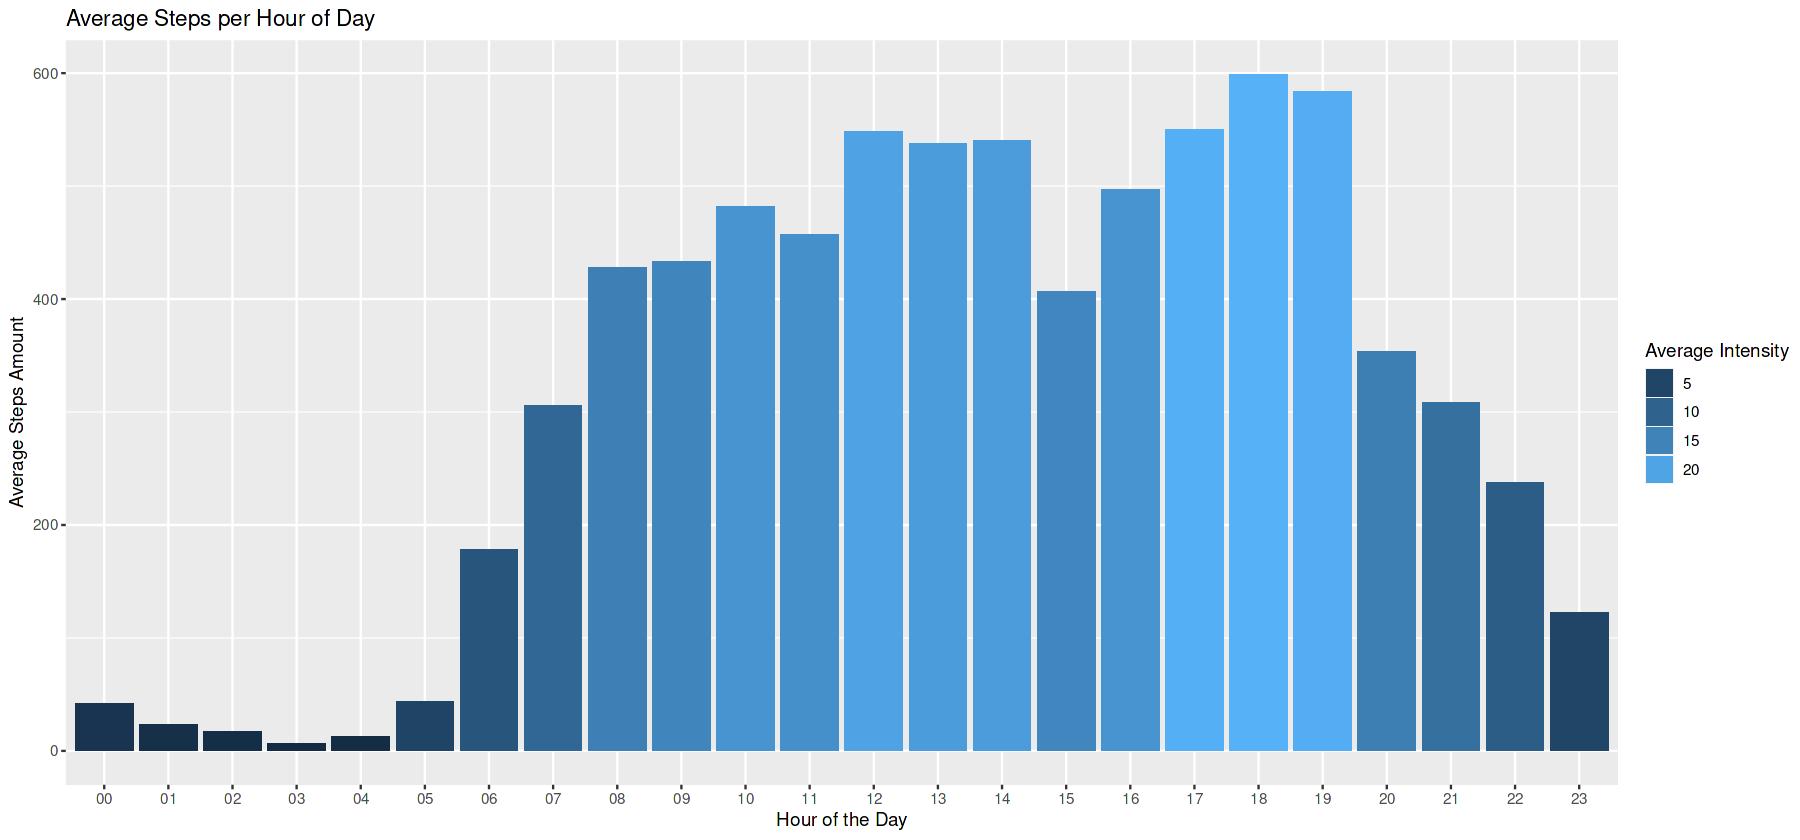

In [70]:
# merging the hourlySteps and the hourlyIntensities tables
merged_hrsteps_hrintensity <- merge(hourlySteps, hourlyIntensities, by = c('Id', 'ActivityHour'))

# grouping by the individual hours summarizing the steps and intensities as averages
avg_steps_hour <- merged_hrsteps_hrintensity %>% group_by(Hour.y) %>% summarise(avg_steps = mean(StepTotal), 
                      avg_intensity = mean(TotalIntensity))
# plotting of the barchart
ggplot(data=avg_steps_hour, aes(x = Hour.y, y = avg_steps, fill=avg_intensity)) + geom_bar(stat = "identity")+
  labs(title = "Average Steps per Hour of Day")+ guides(fill=guide_legend(title = "Average Intensity")) +
  ylab("Average Steps Amount") + xlab("Hour of the Day")

## Lastly:
### Measuring the sleep trends of the users
* How many hours do the users tend to sleep?
* How are the minutes asleep affected by other variables?
### To do:
* Merge sleepDatData and dailyActivity tables
* Make a scatter plot showing minutes asleep vs minutes senentary

In [50]:
# merging sleepDayData and dailyActivity
merged_sleep_activity <- merge(sleepDayData, dailyActivity, by.x = c('Id', 'SleepDay'), 
                               by.y = c('Id', 'ActivityDate'))
head(merged_sleep_activity)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<chr>,<dttm>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,2,384,407,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-15,1,412,442,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,2016-04-16,2,340,367,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,2016-04-17,1,700,712,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,2016-04-19,1,304,320,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


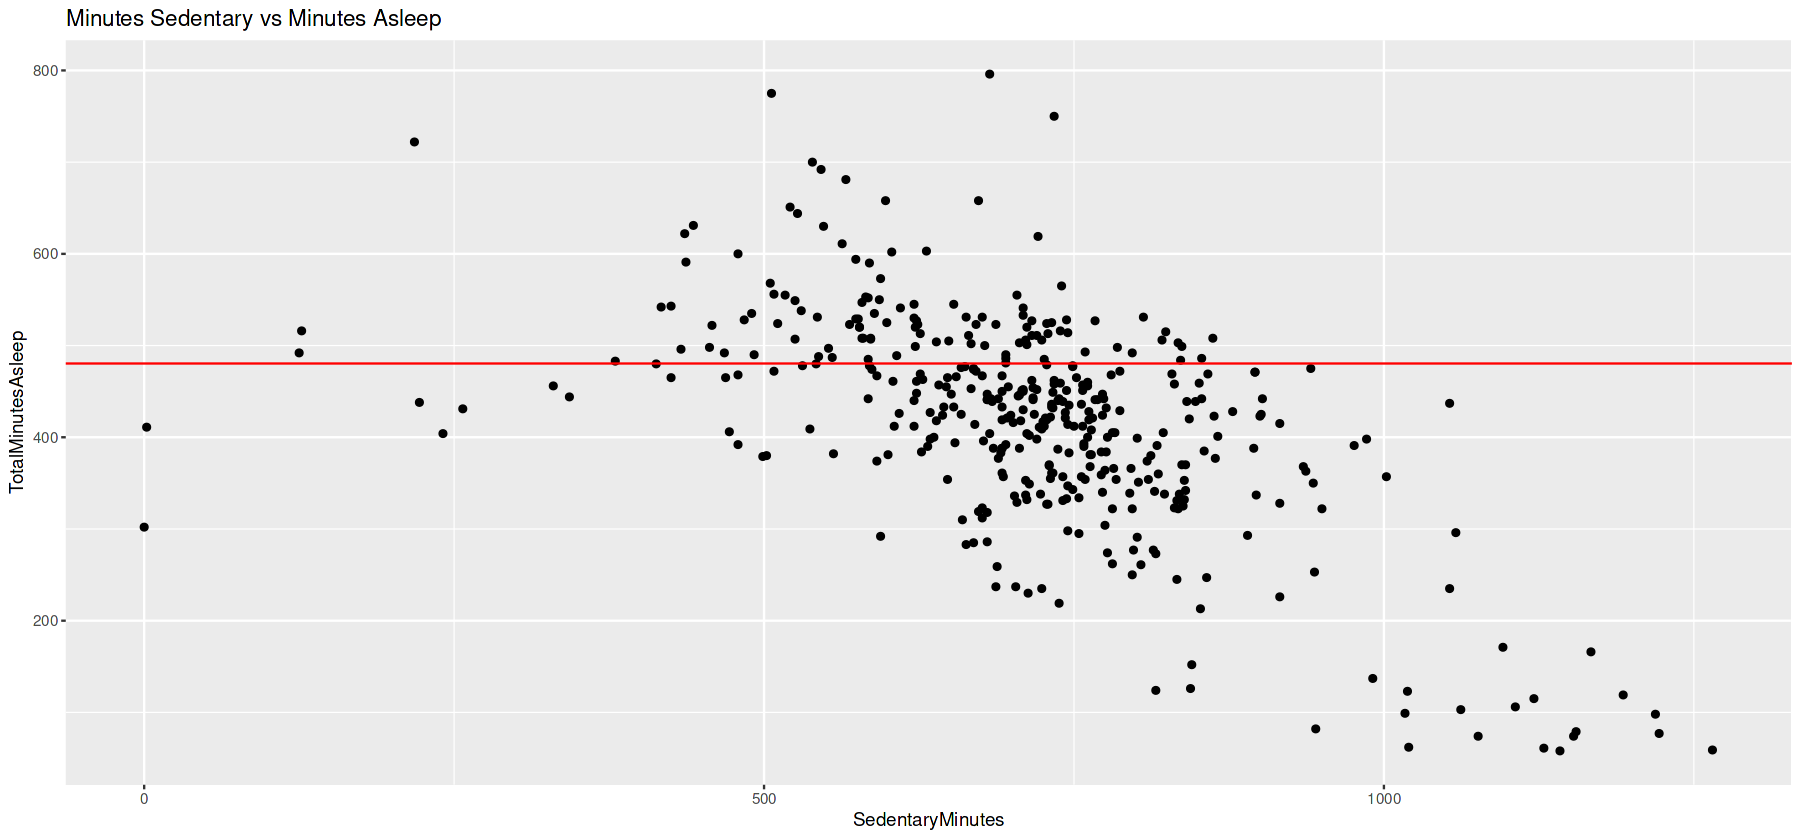

In [62]:
ggplot(data = merged_sleep_activity, aes(x=SedentaryMinutes, y=TotalMinutesAsleep)) +
  geom_point() + labs(title = "Minutes Sedentary vs Minutes Asleep") +
  geom_abline(slope = 0, intercept = 480, color="red")

# Summary
### After looking at the data my analysis is way too many people are not getting enough steps. 
* The percentage of users who averaged at or above the recommended 10,000 steps is 21.21%.
* The percentage of users whos median was at or above the recommended 10,000 steps was 27.27%.

### The hours of activity is mostly daytime hours 
* The hours between 7 AM and 11 PM show the bulk of the daily activity and intensity.
* The hours between 5 PM and 7 PM showing the highest average activity and intensity.
* There is a large fall off of activity between 11 PM and 6 AM.

### The sleep trends of users is mostly under the recommended amount of 8 hours or 480 minutes. 
* The amount of sleep correlates the the amount of time in bed. 
* The minutes a user spends asleep inversely correlates with the minutes the user is sedentary.

# Conclusion
### How to move forward:
1. Bellabeat should help users get their recommended 10,000 steps, because active users of Bellabeats product makes them more likely to be returning customers. 
    * One way of increasing the activity of their users would be to remind the user at hours of peak avtivity to get active.
    * Another way potentially increasing users' activity would be to push the users toward higher intensity when they are already active.
1. Bellabeat can help users get better sleep, because a large number of them are getting below the recommended 8 hours.
    * One way of helping users get better sleep is to increase the amount of time they are in bed since there seems to be a correlation between the two.
    * Another way would be to decrease the amount of sedentary minutes the users have. There seems to be a negative correlation between these two variables.
        * This is probably because the more activity you do the more tired you are at night; making for better sleep.
    * *Important note is that just because there is a correlation doesn't mean there is causation, so results my vary*